In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:

class KMeans:
    def __init__(self, data):
        self.data = data
    def fit(self,k,iters=5,plotting=False):
        self.k =k
        
        
        self.centroids = np.random.randint(self.data.min(),self.data.max(),(k,self.data.shape[1]))+np.random.rand(k,self.data.shape[1])
        
        #dist = np.linalg.norm(self.data-self.centroids,axis=-1)
        for i in range(iters):
            if plotting:
                self.plot()
            dist = np.zeros(shape=(k,self.data.shape[0]))
            for i in range(self.centroids.shape[0]):
                for j in range(self.data.shape[0]):
                    dist[i,j]=np.linalg.norm(self.data[j]-self.centroids[i])

            new_centroids = [list() for x in range(k)]
            mins = np.where(dist==dist.min(axis=0))
            mins = list(zip(mins[0],mins[1]))

            for m in mins:

                new_centroids[m[0]].append(self.data[m[1]])
            for i in range(len(new_centroids)):
                if not new_centroids:
                    new_centroids[i] = self.centroids[i]


            new_centroids = [np.average(np.array(x),axis=0) for x in new_centroids]

            self.centroids = np.array(new_centroids)
            
    def predict(self,x):
        dist = np.linalg.norm(x-self.centroids,axis=1)
        mins = np.where(dist==dist.min(axis=0))
        return mins
            
           
    def plot(self):
    
        
        plt.scatter(self.data[:,0],self.data[:,1])
        plt.scatter(self.centroids[:,0],self.centroids[:,1],color="r")
        plt.show()
    def plot_all(self):
        #colors = ["b","r","y","p"]
        points_colors = []
        for i in self.data:
         
            points_colors.append(self.predict(i)[0][0])
        plt.scatter(self.data[:,0],self.data[:,1],c=points_colors)
        plt.scatter(self.centroids[:,0],self.centroids[:,1],color="r")
       
            
        
        
        
        
# data - > [[x,y]]
x = np.random.randint(0,100,(100,2))+np.random.rand(100,2)
print(x[:5])

kmeans = KMeans(x)

[[ 9.91822115 15.66044977]
 [17.38519023 14.00904239]
 [65.39325084 20.1956686 ]
 [84.80426199 68.4248455 ]
 [55.84804974 27.18131816]]


In [4]:
kmeans.fit(5)

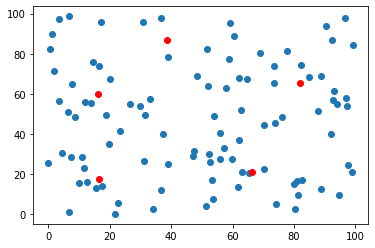

In [5]:
kmeans.plot()

In [6]:
p =np.array([[1,2]])
kmeans.predict(p)

(array([4], dtype=int64),)

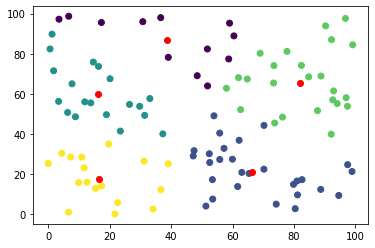

In [7]:
kmeans.plot_all()